In [1]:
import sys
sys.path.append('../RecSysRep/')

In [14]:
import Basics.Load as ld
import scipy.sparse as sps

URM_all, ICM1, ICM2, ICM3, ICM4 = ld.getCOOs()
ICML = ld.getICMlength('5km')
ICM_weighted = ld.getICMselected('7')
ICM_gen = sps.hstack([ICM1, ICM2])
ICM_all = sps.hstack([ICM1, ICM2, ICM3, ICML])
ICM_chall = sps.hstack([ICM1, ICM3, ICML])

In [15]:
from Evaluation.Evaluator import EvaluatorHoldout
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample

URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.8, seed=1234)
# URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_train_validation, train_percentage = 0.8)

evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[10])
# evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[10])

EvaluatorHoldout: Ignoring 13643 ( 0.1%) Users that have less than 1 test interactions


In [16]:
import os

ofp = "../models_temp/Similarity_Hybrid/New/"

models_to_combine_best = {
                            'IALS_Hyb' : {"num_factors": 28, "epochs": 10, "confidence_scaling": "linear", "alpha": 0.43657990940994623, "epsilon": 0.35472063248578317, "reg": 0.0001698292271931609, "mw": 0.06122362507952762},
                            'RP3ICMnew': {'alpha': 1.029719677583138, 'beta': 1.0630164752134375, 'topK': 6964, 'normalize_similarity': True},
                            'RP3ICM' : {"topK": 2550, "alpha": 1.3058102610510849, "beta": 0.5150718337969987, "normalize_similarity": True, "implicit": True},
                            'IALS' :  {'num_factors': 34, 'epochs': 599, 'confidence_scaling': 'linear', 'alpha': 0.003519435539271083, 'epsilon': 0.09222402080721787, 'reg': 2.4127708108457617e-05},
                            'SLIMgensub': {"l1_ratio" : 0.025887359156206147, "topK": 2140, "alpha": 0.009567288586539689, "workers": 8, "mw": 1},
                            'SLIMBPR' : {"epochs": 440, "lambda_i": 0.007773815998802306, "lambda_j": 0.003342522366982381, "learning_rate": 0.010055161410725193, "topK": 4289, "random_seed": 1234, "sgd_mode": "sgd"},
                            'SLIMweig': {'l1_ratio': 0.0005247075138160404, 'topK': 4983, 'alpha': 0.06067400905430761, 'workers': 8, 'mw': 2.308619939318322},
                            'SLIMER': {'topK': 6000, 'l1_ratio': 0.0005495104968035837, 'alpha': 0.08007142704041009, 'workers': 8},
                            'P3alpha': {'topK': 4834, 'alpha': 1.764994849187595, 'normalize_similarity': True, 'implicit': True},
                            'RP3beta': {"topK": 1049, "alpha": 1.1626473723475605, "beta": 0.6765017195261293, "normalize_similarity": True, "implicit": True},
                            'icm_all' : {"shrink": 5675, "topK": 2310, "feature_weighting": "BM25", "normalize": False},
                            'icm_weighted': {"shrink": 4000, "topK": 985, "feature_weighting": "TF-IDF", "normalize": True},
                            'UserKNN' : {"topK": 469, "similarity": "cosine", "shrink": 588, "normalize": True, "feature_weighting": "TF-IDF", "URM_bias": False},
                            'SLIM_BPR_Hyb' : {"epochs": 1443, "lambda_i": 8.900837513818856e-05, "lambda_j": 1.2615223007492727e-05, "learning_rate": 0.0037706733838839264, "topK": 6181, "random_seed": 1234, "sgd_mode": "sgd"}
                         }


In [17]:
def model_init(recommender, name, args):
    path_name = ofp + name + ".zip"
    print(path_name)
    if os.path.exists(path_name):
        print("Model found!")
        recommender.load_model(ofp, name)
    else:
        print("Model does not exists, creating...")
        if not os.path.exists(ofp):
            print("Main folder does not exist, creating...")
            os.makedirs(ofp)
        recommender.fit(**args)
        recommender.save_model(ofp, name)

In [18]:
from Recommenders.NonPersonalizedRecommender import TopPop
from Recommenders.KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender
from Recommenders.EASE_R.EASE_R_Recommender import EASE_R_Recommender
from Recommenders.SLIM.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython
from Recommenders.SLIM.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython_Hybrid
from Recommenders.SLIM.SLIMElasticNetRecommender import MultiThreadSLIM_SLIMElasticNetRecommender
from Recommenders.SLIM.SLIMElasticNetRecommender import MultiThreadSLIM_SLIM_S_ElasticNetRecommender
from Recommenders.GraphBased.P3alphaRecommender import P3alphaRecommender
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommenderICM
from Recommenders.MatrixFactorization.IALSRecommender import IALSRecommender
from Recommenders.MatrixFactorization.IALSRecommender import IALSRecommender_Hybrid
from Recommenders.KNN.UserKNNCFRecommender import UserKNNCFRecommender

In [19]:
from Recommenders.KNN.ItemKNNSimilarityHybridRecommender import ItemKNNSimilarityHybridRecommender
from Recommenders.KNN.ItemKNNSimilarityHybridRecommenderNormal import ItemKNNSimilarityHybridRecommenderNormal
from Recommenders.KNN.ItemKNNScoresHybridMultipleRecommender import ItemKNNScoresHybridMultipleRecommender
from Recommenders.KNN.ItemKNNScoresHybridMultipleRecommender import ItemKNNScoresHybridTwoRecommender
from Recommenders.KNN.ItemKNNScoresHybridMultipleRecommender import ItemKNNScoresHybridTwoRecommender_PRELOAD

In [20]:
recommender1a = MultiThreadSLIM_SLIM_S_ElasticNetRecommender(URM_train, ICM_gen)
recommender2a = IALSRecommender_Hybrid(URM_train, ICM_chall)
recommender3a = RP3betaRecommender(URM_train)

model_init(recommender1a, 'SLIMgen', models_to_combine_best['SLIMgensub'])
model_init(recommender2a, 'IALSHyb', models_to_combine_best['IALS_Hyb'])
model_init(recommender3a, 'RP3beta', models_to_combine_best['RP3beta'])

../models_temp/Similarity_Hybrid/New/SLIMgen.zip
Model does not exists, creating...
Main folder does not exist, creating...


100%|███████████████████████████████████████████████████████████████████████████▉| 18056/18059 [20:43<00:00, 14.52it/s]


SLIMElasticNetRecommender: Saving model in file '../models_temp/Similarity_Hybrid/New/SLIMgen'
SLIMElasticNetRecommender: Saving complete
../models_temp/Similarity_Hybrid/New/IALSHyb.zip
Model does not exists, creating...
10
IALSRecommender_Hybrid: Epoch 1 of 10. Elapsed time 23.93 sec
IALSRecommender_Hybrid: Epoch 2 of 10. Elapsed time 1.12 min
IALSRecommender_Hybrid: Epoch 3 of 10. Elapsed time 1.54 min
IALSRecommender_Hybrid: Epoch 4 of 10. Elapsed time 1.90 min
IALSRecommender_Hybrid: Epoch 5 of 10. Elapsed time 2.07 min
IALSRecommender_Hybrid: Epoch 6 of 10. Elapsed time 2.29 min
IALSRecommender_Hybrid: Epoch 7 of 10. Elapsed time 2.51 min
IALSRecommender_Hybrid: Epoch 8 of 10. Elapsed time 2.70 min
IALSRecommender_Hybrid: Epoch 9 of 10. Elapsed time 2.79 min
IALSRecommender_Hybrid: Epoch 10 of 10. Elapsed time 2.85 min
IALSRecommender_Hybrid: Terminating at epoch 10. Elapsed time 2.85 min
IALSRecommender_Hybrid: Saving model in file '../models_temp/Similarity_Hybrid/New/IALSHyb'


In [17]:
def rank_models(evaluator, recommenders):
    for r in recommenders:
        r_d, _ = evaluator.evaluateRecommender(r)
        print(r.RECOMMENDER_NAME, r_d.loc[10]['MAP'])

In [18]:
rank_models(evaluator_validation, [recommender1, recommender2])

Deallocating Cython objects
EvaluatorHoldout: Processed 13645 (100.0%) in 1.30 min. Users per second: 175
             MAP
cutoff          
10      0.225332
SLIM_BPR_Recommender 0.22533241143043353
EvaluatorHoldout: Processed 13645 (100.0%) in 36.20 sec. Users per second: 377
            MAP
cutoff         
10      0.24782
SLIMElasticNetRecommender 0.2478195949443658


In [19]:
import numpy as np

def test_percentage_sim(recommender_a, recommender_b, evaluator, high1, low1, step):
    recommender = ItemKNNSimilarityHybridRecommenderNormal(URM_train, recommender_a.W_sparse, recommender_b.W_sparse)
    results = []
    alp_space = np.linspace(high1, low1, step, True)
    for alp in alp_space:
        recommender.fit(alp)
        r_d, _ = evaluator.evaluateRecommender(recommender)
        print(alp, ":", r_d.loc[10]['MAP'])
        results.append(r_d.loc[10]['MAP'])
    
    return alp_space, results

def test_percentage_sco(recommender_a, recommender_b, evaluator, high1, low1, step):
    recommender = ItemKNNScoresHybridTwoRecommender(URM_train, recommender_a, recommender_b)
    results = []
    alp_space = np.linspace(high1, low1, step, True)
    for alp in alp_space:
        recommender.fit(alp)
        r_d, _ = evaluator.evaluateRecommender(recommender)
        print(alp, ":", r_d.loc[10]['MAP'])
        results.append(r_d.loc[10]['MAP'])
    
    return alp_space, results

EvaluatorHoldout: Processed 7000 (51.3%) in 5.54 min. Users per second: 21
EvaluatorHoldout: Processed 13645 (100.0%) in 10.27 min. Users per second: 22
             MAP
cutoff          
10      0.248856
0.4 : 0.2488556858434095
EvaluatorHoldout: Processed 6000 (44.0%) in 5.39 min. Users per second: 19
EvaluatorHoldout: Processed 13645 (100.0%) in 9.39 min. Users per second: 24
             MAP
cutoff          
10      0.248982
0.5 : 0.24898248966131045
EvaluatorHoldout: Processed 8000 (58.6%) in 5.17 min. Users per second: 26
EvaluatorHoldout: Processed 13645 (100.0%) in 9.00 min. Users per second: 25
             MAP
cutoff          
10      0.248201
0.6 : 0.24820068691944897


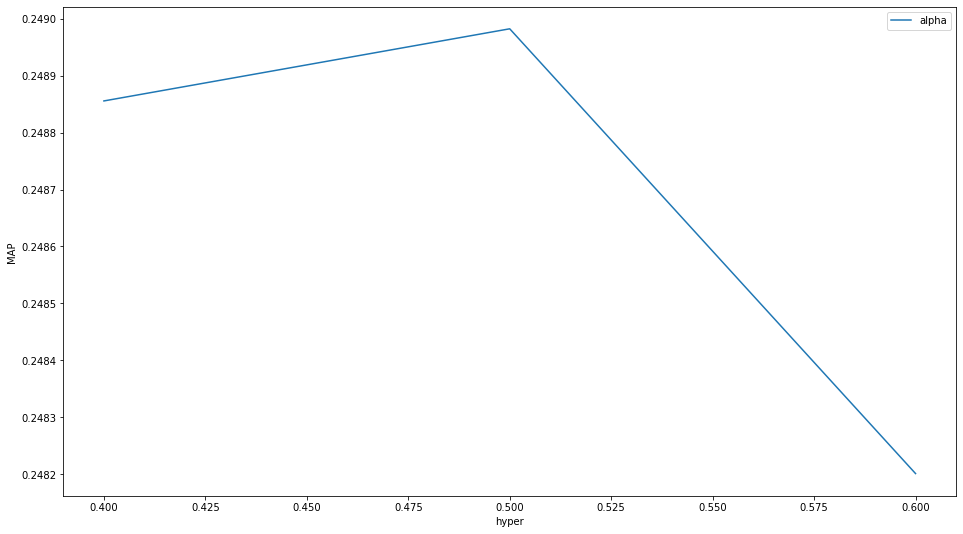

In [20]:
import matplotlib.pyplot as plt
import numpy as np

alp_space, results = test_percentage_sco(recommender1, recommender2, evaluator_validation, 0.4, 0.6, 3)

_ = plt.figure(figsize=(16, 9))

plt.plot(alp_space, results, label='alpha')
plt.ylabel('MAP')
plt.xlabel('hyper')
plt.legend()
plt.show()

In [ ]:
def test_percentage_scores_until(recommender_1, recommender_2, evaluator, step, min_a, max_a):
    recommender = ItemKNNScoresHybridTwoRecommender(URM_train, recommender_1, recommender_2)
    results = []
    alp_space = np.linspace(min_a, max_a, step, True)
    for alp in alp_space:
        recommender.fit(alpha = alp)
        r_d, _ = evaluator.evaluateRecommender(recommender)
        print(alp, ":", r_d.loc[10]['MAP'])
        results.append(r_d.loc[10]['MAP'])
    maximum = alp_space[np.argmax(results)]
    print("MAX FOUND AT FIRST STEP ", maximum)
    
    supa = (max_a-min_a)/step
    
    alp_scape = np.linspace(maximum - supa, maximum + supa, step+5, True)
    results = []
    
    for alp in alp_scape:
        recommender.fit(alpha = alp)
        r_d, _ = evaluator.evaluateRecommender(recommender)
        print(alp, ":", r_d.loc[10]['MAP'])
        results.append(r_d.loc[10]['MAP'])
    maximum = alp_scape[np.argmax(results)] 
    
    print("MAX FOUND FOR ", r.RECOMMENDER_NAME, " ", np.max(results))
    return maximum, np.max(results)

In [ ]:
recommenders = [ recommender_puresvd, recommender_itemknn_icm, recommender_rp3, recommender_ials]
results = {}
for r in recommenders:
    print("NOW TESTING RECOMMENDER ", r.RECOMMENDER_NAME )
    results[r.RECOMMENDER_NAME] = test_percentage_scores_until(recommender_hybrid_2, r, evaluator_validation, 10, 0.1, 0.99)

In [ ]:
class Objective(object):
    def __init__(self, URM_train, recommender1, recommender2, recommender3, evaluator):
        # Hold this implementation specific arguments as the fields of the class.
        self.URM_train = URM_train
        self.evaluator = evaluator
        self.recommender_1 = recommender1
        self.recommender_2 = recommender2
        self.recommender_3 = recommender3

    def __call__(self, trial):
        # Calculate an objective value by using the extra arguments.
        alpha = trial.suggest_uniform('alpha', 0, 1)
        beta = trial.suggest_uniform('beta', 0, 1)
        gamma = trial.suggest_uniform('gamma', 0, 1)

        recommender_final = ThreeDifferentModelRecommender(self.URM_train.tocsr(), self.recommender_1, self.recommender_2, self.recommender_3)
        recommender_final.fit(2, alpha, beta, gamma)
        result_dict, _ = self.evaluator.evaluateRecommender(recommender_final)

        map_v = -result_dict.loc[10]['MAP']
        if map_v >= -0.245: # minimum acceptable map
            # Calculate the penalty.
            penalty = 0.245 + map_v
            trial.report(penalty, 0)

            if trial.should_prune():
                raise optuna.exceptions.TrialPruned()

        return map_v

study = optuna.create_study(direction='minimize')
study.optimize(Objective(URM_train, recommender1, recommender2, recommender3, evaluator_validation), n_trials=500)

print(study.best_params)